<a href="https://colab.research.google.com/github/L-Brandao/C03T04---Tarefa2/blob/main/C03T04_Tarefa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I - Tarefa
Professores: *Diego Nogare* & *Rogério de Oliveira* 

**Lucas J. L. Brandão - 92211402**

Fonte: https://www.gapminder.org/data/

Tema: EDA Energia - Consumo e produção de petróleo

#Elaboração

Com a tecnologia e os avanços dos dias atuais cada vez mais rápidos o que mais iremos necessitar é de energia. Tema este que está em alta devido aos acontecimentos recentes (COVID-19 e mais recente a invação da Russia na Ucrânia). Eventos estes, que por sua vez, estão desencadeando uma série de efeitos colaterias na distibuição de energia.

Está base infelizmente não tem dados atuais, porém é possível observar como o consumo de petróleo tende a crescer.

Abaixo seguiremos com a analise EDA 

#Exploração

##Importe das bibliotecas necessárias e das bases

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

prod_pet = pd.read_csv('https://raw.githubusercontent.com/L-Brandao/C03T04---Tarefa2/main/oil_production_total.csv')
cons_pet = pd.read_csv('https://raw.githubusercontent.com/L-Brandao/C03T04---Tarefa2/main/oil_consumption_total.csv')

##Verificando a estrutura base e dados

In [ ]:
display(prod_pet.shape)
display(cons_pet.shape)

(50, 56)

(80, 56)

In [ ]:
display(prod_pet.head())
display(cons_pet.head())

,country,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,655k,631k,537k,750k,2.46M,5.07M,5.72M,7.06M,8.18M,...,88.9M,82M,85.3M,85.2M,83.3M,88.2M,85.8M,81.6M,74.1M,69.1M
1,United Arab Emirates,13.7M,17.4M,18.5M,24.1M,30.4M,37.8M,51.3M,58.4M,74.2M,...,135M,150M,156M,163M,163M,176M,182M,176M,177M,180M
2,Argentina,13.8M,14.6M,16M,17.5M,18.1M,20M,21.6M,22.2M,21.6M,...,33.3M,31.2M,30.8M,30.2M,29.8M,30M,28.6M,27.2M,27.5M,28.8M
3,Australia,346k,445k,1.04M,1.93M,2.23M,8.7M,15.3M,16.3M,20.4M,...,24.5M,21.5M,21.4M,17.8M,19.1M,17M,15.6M,14.9M,15.2M,20.6M
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.3M,46.1M,43.7M,43.8M,42.5M,42M,41.4M,39.1M,39.2M,38.1M


,country,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United Arab Emirates,69.6k,74.3k,79.8k,89.1k,99k,115k,136k,179k,280k,...,31.3M,33.8M,35.2M,39M,39.3M,42.2M,44.9M,44.2M,46M,44.6M
1,Argentina,22M,22.8M,23.3M,23.8M,24.7M,22.1M,23.6M,23.6M,23.7M,...,27.5M,27.4M,28.6M,30.7M,30.1M,30.9M,30.2M,29.4M,28.1M,27.6M
2,Australia,15.1M,18M,19.7M,21.5M,22.1M,24.4M,25.7M,26.1M,27.9M,...,41.6M,44.4M,46.1M,46.9M,47.4M,45.6M,46M,48.1M,49.5M,49.1M
3,Austria,5.56M,6.12M,6.51M,7.54M,8.28M,9.1M,10.2M,11M,11.9M,...,12.7M,11.9M,11.9M,12.2M,11.7M,11.7M,12.1M,12.3M,12.4M,12.7M
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.26M,3.99M,4.17M,4.54M,4.45M,4.54M,4.52M,4.56M,4.78M,4.93M


##Reshape e merge

Como pode ser notado acima, a base possui o período distribuído pelas colunas o que dificultará a analise. Logo, realisei o reshape nas duas tabelas através do melt para transpo-las as linhas e em seguida utilizei o merge para a união das duas bases que agora possuiam a mesma estrutura.

In [ ]:
prod_pet_melt = prod_pet.melt(id_vars=['country'], value_vars=prod_pet.drop('country',axis='columns').columns, var_name = 'Ano', value_name = 'Prod_Petroleo')
cons_pet_melt = cons_pet.melt(id_vars=['country'], value_vars=cons_pet.drop('country',axis='columns').columns, var_name = 'Ano', value_name = 'Cons_Petroleo')

petroleo_bruta = pd.merge(prod_pet_melt,cons_pet_melt, how = 'outer')

petroleo_bruta.head()

,country,Ano,Prod_Petroleo,Cons_Petroleo
0,Angola,1964,655k,NaN
1,United Arab Emirates,1964,13.7M,69.6k
2,Argentina,1964,13.8M,22M
3,Australia,1964,346k,15.1M
4,Azerbaijan,1964,NaN,NaN


##Adequando dados divergentes

Nas colunas de valores ha dois padrões fora do modelo numérico, a letra 'k' simbolizando milhar e a letra 'M' para abreviar os resultados acima de 1 milhão.

Utilizei o método contains para a busca do caracter e split para a retirada da letra, logo após multipliquei pelo respectivo significado.


In [ ]:
# Prod_Petroleo
k = petroleo_bruta[petroleo_bruta['Prod_Petroleo'].str.contains('k', na=False)].Prod_Petroleo.str.split('k').str[0].astype(float) * 1000
petroleo_bruta.update(k)
M = petroleo_bruta[petroleo_bruta['Prod_Petroleo'].str.contains('M', na=False)].Prod_Petroleo.str.split('M').str[0].astype(float) * 1000000
petroleo_bruta.update(M)

# Cons_Petroleo
k = petroleo_bruta[petroleo_bruta['Cons_Petroleo'].str.contains('k', na=False)].Cons_Petroleo.str.split('k').str[0].astype(float) * 1000
petroleo_bruta.update(k)
M = petroleo_bruta[petroleo_bruta['Cons_Petroleo'].str.contains('M', na=False)].Cons_Petroleo.str.split('M').str[0].astype(float) * 1000000
petroleo_bruta.update(M)

display(petroleo_bruta)

,country,Ano,Prod_Petroleo,Cons_Petroleo
0,Angola,1964,655000.0,NaN
1,United Arab Emirates,1964,13700000.0,69600.0
2,Argentina,1964,13800000.0,22000000.0
3,Australia,1964,346000.0,15100000.0
4,Azerbaijan,1964,NaN,NaN
...,...,...,...,...
5110,Sweden,2018,NaN,13300000.0
5111,Turkey,2018,NaN,47900000.0
5112,Taiwan,2018,NaN,44100000.0
5113,Ukraine,2018,NaN,10100000.0


## Ajuste de tipo de dado

Após ajustado as divergências, corrigi os tipos de atributos das colunas

In [ ]:
petroleo_bruta.dtypes

country          object
Ano              object
Prod_Petroleo    object
Cons_Petroleo    object
dtype: object

In [ ]:
petroleo = petroleo_bruta

petroleo.Ano = petroleo_bruta.Ano.astype(int)
petroleo.Prod_Petroleo = petroleo_bruta.Prod_Petroleo.astype(float)
petroleo.Cons_Petroleo = petroleo_bruta.Cons_Petroleo.astype(float)

petroleo_bruta.dtypes

country           object
Ano                int64
Prod_Petroleo    float64
Cons_Petroleo    float64
dtype: object

#Analise de nulos e primeiras estatísticas 

Abaixo podemos notar que há um grande percentual de nulos, tando para produção quando consumo, o que causará numa diminuíção considerável dos dados.

In [ ]:
display(petroleo.isnull().sum()/len(petroleo))

country          0.000000
Ano              0.000000
Prod_Petroleo    0.530987
Cons_Petroleo    0.201564
dtype: float64

##Filtrando dados

In [ ]:
petroleo = petroleo[~ petroleo.Cons_Petroleo.isnull() & ~ petroleo.Prod_Petroleo.isnull()]

In [ ]:
display(petroleo.Ano.agg(['max','min']))
display(petroleo.describe())

max    2018
min    1964
Name: Ano, dtype: int64

,Ano,Prod_Petroleo,Cons_Petroleo
count,1847.000000,1.847000e+03,1.847000e+03
mean,1992.322685,8.855165e+07,6.372582e+07
std,15.546834,1.260995e+08,1.441605e+08
min,1964.000000,4.780000e+04,4.700000e+04
25%,1979.000000,1.185000e+07,7.505000e+06
50%,1993.000000,3.630000e+07,1.930000e+07
75%,2006.000000,1.140000e+08,6.155000e+07
max,2018.000000,7.470000e+08,9.270000e+08


#Questões

##Qual a tendência no consumo de petróleo?

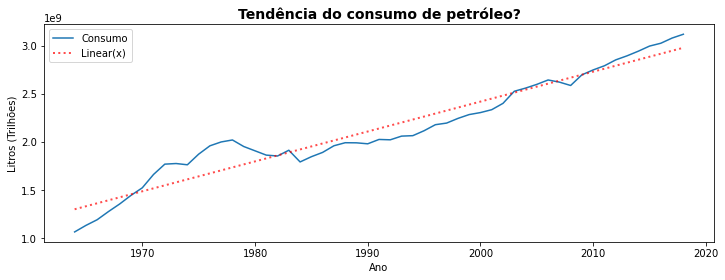

In [ ]:
pet_ano = pd.DataFrame(petroleo.groupby('Ano').sum()[['Cons_Petroleo']]).reset_index()

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(pet_ano.Ano, pet_ano.Cons_Petroleo, label = 'Consumo')

ax.set_title('Tendência do consumo de petróleo?', fontsize=14, weight='bold')
ax.set_xlabel('Ano')
ax.set_ylabel('Litros (Trilhões)')

z = np.polyfit(pet_ano.Ano, pet_ano.Cons_Petroleo, 1)
p = np.poly1d(z)
ax.plot(pet_ano.Ano, p(pet_ano.Ano), linestyle=':', label='Linear(x)', linewidth=2, color='red', alpha=0.7)


ax.legend()

#ax.xaxis.set_major_locator(ticker.MaxNLocator(13))

plt.show()

Conclusão: Notamos que o consumo saiu de abaixo de 1.5 Tri de litros na decada de 60 para mais de 3 Tri atualmente. Segundo uma tendência de crescimento.

## Quais são os paises com maior consumo de petróleo? E qual a sua produção?

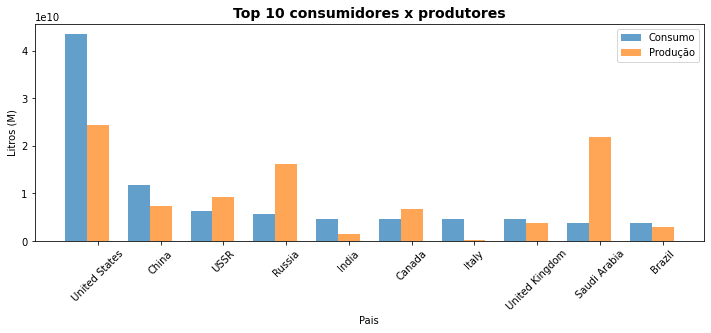

In [ ]:
pet_country = pd.DataFrame(petroleo.groupby('country').sum()[['Cons_Petroleo','Prod_Petroleo']]).reset_index()
pet_country = pet_country.loc[pet_country.Cons_Petroleo.nlargest(10).index][['Cons_Petroleo','Prod_Petroleo','country']]

dist = 0.35

bar1 = pet_country.Cons_Petroleo
bar2 = pet_country.Prod_Petroleo

x1 = np.arange(len(bar1))
x2 = [x + dist for x in x1]

fig, ax = plt.subplots(figsize=(12,4))

ax.set_title('Top 10 consumidores x produtores', fontsize=14, weight='bold')
ax.set_xlabel('Pais')
ax.set_ylabel('Litros (M)')

plt.bar(x1,bar1, label = 'Consumo', width = dist, alpha = 0.7)
plt.bar(x2,bar2, label = 'Produção', width = dist, alpha = 0.7)

plt.xlabel
plt.xticks([i + dist for i in range(len(bar1))], pet_country.country)
plt.xticks(rotation=45)
plt.legend()

plt.show()

Conclusão: Como há de se esperar, uma das maiores podência mundial (Estados Unidos) é facil de se notar no consumo do petróleo. O que chama atenção é que ele também é o maior produto no acumulado da base.

##Qual a relação entre o consumo e a produção? Os Maiores consumidores são os maiores produtores também?


In [ ]:
np.array(pet_country.loc[pet_country.Cons_Petroleo.nlargest(10).index]['country'])

array(['United States', 'China', 'USSR', 'Russia', 'India', 'Canada',
       'Italy', 'United Kingdom', 'Saudi Arabia', 'Brazil'], dtype=object)

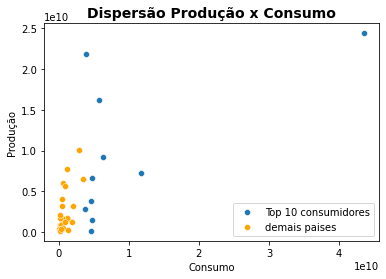

In [ ]:
pet_not_null = pd.DataFrame(petroleo.groupby('country').sum()[['Cons_Petroleo','Prod_Petroleo']]).reset_index()

top = pet_not_null[pet_not_null.country.isin(['United States', 'China', 'USSR', 'Russia', 'India', 'Canada',
       'Italy', 'United Kingdom', 'Saudi Arabia', 'Brazil'])]

out_top = pet_not_null[ ~ pet_not_null.country.isin(['United States', 'China', 'USSR', 'Russia', 'India', 'Canada',
       'Italy', 'United Kingdom', 'Saudi Arabia', 'Brazil'])]

x_top = top.Cons_Petroleo
x_out_top = out_top.Cons_Petroleo

y_top = top.Prod_Petroleo
y_out_top = out_top.Prod_Petroleo

fig, ax = plt.subplots(figsize=(6,4))

ax.set_title('Dispersão Produção x Consumo', fontsize=14, weight='bold')
ax.set_xlabel('Consumo')
ax.set_ylabel('Produção')

sns.scatterplot(x=x_top, y=y_top, label = 'Top 10 consumidores')
sns.scatterplot(x=x_out_top, y=y_out_top, label = 'demais paises', color = 'orange')

plt.show()

Conclusão: Através da disperção notamos que os paises em geral estão em um equilibrio entre a produção e o consumo, tendendo a produzir mais do que consome, levando em consideração que retiramos os países, mandento somente os que possuíam valores de produção e consumo.

##Qual a evolução do Maior consumidor e sua produção comparado ao seu antecesor de produção?

In [ ]:
pet_not_na = petroleo
#pet_not_na = pet_not_na[pet_not_na.Cons_Petroleo > 100000000]
petroleo_norm = ( pet_not_na.drop(columns=['country','Ano']) - pet_not_na.drop(columns=['country','Ano']).mean() ) / pet_not_na.drop(columns=['country','Ano']).std()
petroleo_norm = pd.concat([pet_not_na[['country','Ano']], petroleo_norm],axis=1)
petroleo_norm.head()

,country,Ano,Prod_Petroleo,Cons_Petroleo
1,United Arab Emirates,1964,-0.593592,-0.441565
2,Argentina,1964,-0.592799,-0.289440
3,Australia,1964,-0.699492,-0.337303
5,Brazil,1964,-0.662189,-0.339384
7,Canada,1964,-0.354099,-0.068853


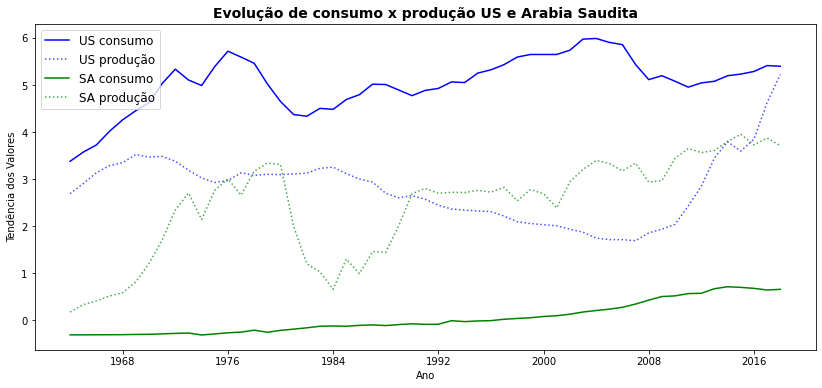

In [ ]:
pet_nona = petroleo_norm

US = pet_nona[pet_nona.country == 'United States']
SA = pet_nona[pet_nona.country == 'Saudi Arabia']

fig, ax = plt.subplots(figsize=(14,6))

ax.set_title('Evolução de consumo x produção US e Arabia Saudita', fontsize=14, weight='bold')
ax.set_xlabel("Ano")
ax.set_ylabel("Tendência dos Valores")

ax.plot(US.Ano, US.Cons_Petroleo, 'b', label='US consumo')
ax.plot(US.Ano, US.Prod_Petroleo, ':b', label='US produção', alpha=0.7)
ax.plot(SA.Ano, SA.Cons_Petroleo, 'g', label='SA consumo')
ax.plot(SA.Ano, SA.Prod_Petroleo, ':g', label='SA produção', alpha=0.7)

ax.legend(fontsize=12)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Conclusão: O que fica bem evidente é a busca do equilibrio do consumo x produção quando olhamos para o maior consumidor de petróleo. Chegando próximo de uma relação 1:1 entre elas.